### 04 - Fundamental concepts for image transformation and Fourier Transform

(Moacir A. Ponti, ICMC/USP, 2021)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Part A - Representations of functions

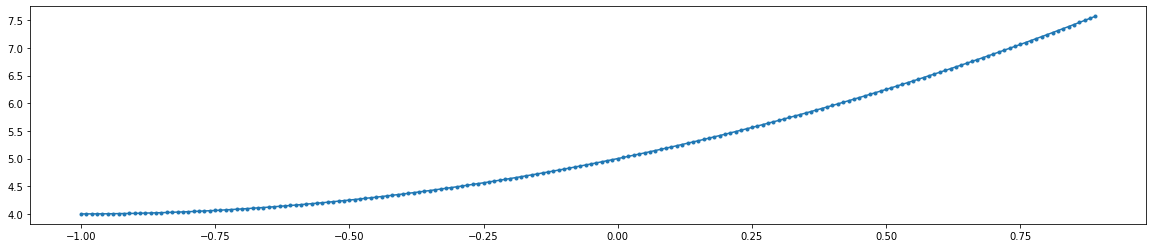

In [2]:
x = np.arange(-1, 0.9, 0.01) # values in which the function is evaluated at
f = 5 + 2*x + x**2   # polynomial with coefficients 5, 2 and 1

plt.figure(figsize=(20,4))
plt.plot(x,f, '.-')

In [3]:
sx = np.zeros(round(len(x)/20.0))
sf = np.zeros(round(len(x)/20.0))
print(sx)
print(sf)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# sampling 10 points
j = 0
for i in range(0, len(x)+1, 21):
    print("%.2f, %.2f" % (x[i], f[i]))
    sx[j] = x[i]
    sf[j] = f[i]    
    j = j+1

-1.00, 4.00
-0.79, 4.04
-0.58, 4.18
-0.37, 4.40
-0.16, 4.71
0.05, 5.10
0.26, 5.59
0.47, 6.16
0.68, 6.82
0.89, 7.57


In [5]:
Y = sf
N = 2 # degree of polynomial

A = np.zeros( [ len(Y), N+1] )
A[:,0] = sx**N
A[:,1] = sx**(N-1)
A[:,2] = 1
print(A)

[[ 1.     -1.      1.    ]
 [ 0.6241 -0.79    1.    ]
 [ 0.3364 -0.58    1.    ]
 [ 0.1369 -0.37    1.    ]
 [ 0.0256 -0.16    1.    ]
 [ 0.0025  0.05    1.    ]
 [ 0.0676  0.26    1.    ]
 [ 0.2209  0.47    1.    ]
 [ 0.4624  0.68    1.    ]
 [ 0.7921  0.89    1.    ]]


In [6]:
from numpy.linalg import inv

C1 = inv(np.matmul(np.transpose(A), A))
C2 = np.matmul(np.transpose(A), Y)
C = np.matmul(C1, C2)
print(C)

[1. 2. 5.]


### Part B - Sinusoids and Complex Exponentials

Remember we want functions with the property:

$f(t) = f(t+ k T)$,
in which $T$ is the period and $k=0,1,\ldots$

Let us see in practice the mathematical properties of sinusoids for such scenario

In [19]:
# evaluating sine at t=2.5
t = 2.5
print("%.3f" % (np.sin(t)))

# now let us evaluate it at t + the period 2 PI
T = 2*np.pi
print("%.3f" % (np.sin(t+T)))

0.598
0.598


In fact any multiple of 2 PI will have the same value!

In [8]:
for i in range(5):
    print("%d %.3f" % (i, np.sin(t+T*i)))

0 0.598
1 0.598
2 0.598
3 0.598
4 0.598


In [9]:
for i in range(5):
    print("%d %.3f" % (i, np.cos(t+T*i)))

0 -0.801
1 -0.801
2 -0.801
3 -0.801
4 -0.801


Visualizing 5 repetitions of the cosine and sine pattern below, we see that those have the same *shape* however they differ because they are shifted with respect to each other

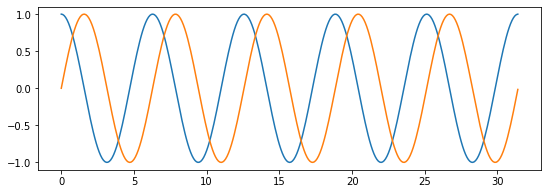

In [10]:
t = np.arange(0, T*5, 0.1)

fcos = np.cos(t)
fsin = np.sin(t)

plt.figure(figsize=(9,3))
plt.plot(t, fcos)
plt.plot(t, fsin)

This shift allow us to define the unitary circle in terms of sine and cosine

This is important because, when relating sine and cosine we can form the simplest periodic object. Note also that the circle may be formed by a single repetition of both sine and cosine, although we are using 5 of them.

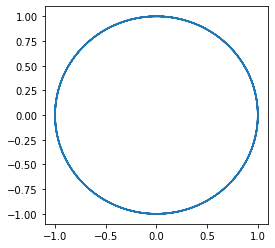

In [11]:
plt.figure(figsize=(4,4))
plt.plot(fcos, fsin)

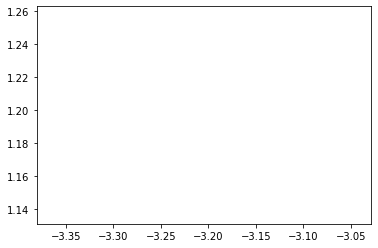

In [20]:
# weighing both coordinates allows for different shapes and elipses
fcos = 4*np.cos(t)
fsin = 2*np.sin(t)
plt.plot(fcos, fsin)

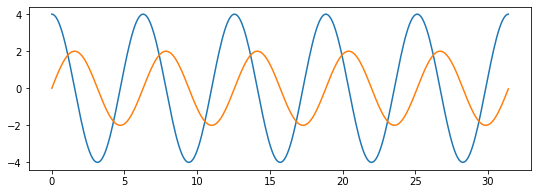

In [13]:
plt.figure(figsize=(9,3))
plt.plot(t, fcos)
plt.plot(t, fsin)

#### Complex numbers and their relationship with periodic functions

To create a complex number in Python we use the letter "j"

In [14]:
complex_number = (3 + 2j)
print(complex_number)

(3+2j)


It can be seen basically as a vector, a representation of two numbers into one:

In [15]:
print(complex_number.real)
print(complex_number.imag)

3.0
2.0


If I compute the exponential of a complex number, the result is also complex:

In [21]:
expon_2_5 = np.exp(2.5j)
print(expon_2_5)

(-0.8011436155469337+0.5984721441039565j)


In [17]:
print("Real part: %.4f, Imaginary part = %.4f" % (expon_2_5.real, expon_2_5.imag))

Real part: -0.8011, Imaginary part = 0.5985


But note that this related to cosine and sine, so the exponential evaluated at 2.5 results in real and imaginary components that are in fact cosine and sine evaluated at 2.5, respectively

In [18]:
print("Cosine: %.4f, Sine = %.4f" % (np.cos(2.5), np.sin(2.5)))

Cosine: -0.8011, Sine = 0.5985
